## 기본세팅 및 참고사항
[참고 블로그](https://hanryang1125.tistory.com/16)

In [1]:
import pandas as pd
import torch

In [27]:
df = pd.read_csv(path + '페트병_1039.csv')
df.head()

,name,class,detail,damage,trans,fill,tag,dirty,color
0,PET_PET.0.jpg,페트병류,페트병,원형,불투명,0,1,0,0
1,PET_PET.1.jpg,페트병류,페트병,원형,불투명,0,1,0,0
2,PET_PET.2.jpg,페트병류,페트병,원형,불투명,0,1,0,0
3,PET_PET.3.jpg,페트병류,페트병,원형,불투명,0,1,0,0
4,PET_PET.4.jpg,페트병류,페트병,원형,불투명,0,1,0,0


In [28]:
df['name'][:1039] = files[:1039]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
df.head()

,name,class,detail,damage,trans,fill,tag,dirty,color
0,/content/drive/MyDrive/T1_PJ/DATA/생활 폐기ᄆ...,페트병류,페트병,원형,불투명,0,1,0,0
1,/content/drive/MyDrive/T1_PJ/DATA/생활 폐기ᄆ...,페트병류,페트병,원형,불투명,0,1,0,0
2,/content/drive/MyDrive/T1_PJ/DATA/생활 폐기ᄆ...,페트병류,페트병,원형,불투명,0,1,0,0
3,/content/drive/MyDrive/T1_PJ/DATA/생활 폐기ᄆ...,페트병류,페트병,원형,불투명,0,1,0,0
4,/content/drive/MyDrive/T1_PJ/DATA/생활 폐기ᄆ...,페트병류,페트병,원형,불투명,0,1,0,0


In [31]:
ndf = df[:1039]
ndf

,name,class,detail,damage,trans,fill,tag,dirty,color
0,/content/drive/MyDrive/T1_PJ/DATA/생활 폐기ᄆ...,페트병류,페트병,원형,불투명,0,1,0,0
1,/content/drive/MyDrive/T1_PJ/DATA/생활 폐기ᄆ...,페트병류,페트병,원형,불투명,0,1,0,0
2,/content/drive/MyDrive/T1_PJ/DATA/생활 폐기ᄆ...,페트병류,페트병,원형,불투명,0,1,0,0
3,/content/drive/MyDrive/T1_PJ/DATA/생활 폐기ᄆ...,페트병류,페트병,원형,불투명,0,1,0,0
4,/content/drive/MyDrive/T1_PJ/DATA/생활 폐기ᄆ...,페트병류,페트병,원형,불투명,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1034,/content/drive/MyDrive/T1_PJ/DATA/생활 폐기ᄆ...,페트병류,페트병,원형,투명,0,1,0,0
1035,/content/drive/MyDrive/T1_PJ/DATA/생활 폐기ᄆ...,페트병류,페트병,원형,투명,0,1,0,0
1036,/content/drive/MyDrive/T1_PJ/DATA/생활 폐기ᄆ...,페트병류,페트병,원형,투명,0,1,0,0
1037,/content/drive/MyDrive/T1_PJ/DATA/생활 폐기ᄆ...,페트병류,페트병,원형,투명,0,1,0,0


In [32]:
path = '/content/drive/MyDrive/T1_PJ/DATA/생활 폐기물 이미지/Training/'

In [33]:
image_path = path + '페트_페트병_원본/'
info_path = path + 'Training_라벨링데이터/페트_페트병/'

In [51]:
import glob

# 확장자
extension = "*.jpg"

# 텍스트 파일이 저장될 경로
save_at = '/content/drive/MyDrive/darknet/' + 'custom.txt'

# 대상 폴더에서 지정한 확장자를 가진 파일들의 경로를 리스트화
path_list = list(glob.glob('/content/drive/MyDrive/img/' + extension))
path_list[:5]

['/content/drive/MyDrive/img/pet1.jpg',
 '/content/drive/MyDrive/img/pet2.jpg',
 '/content/drive/MyDrive/img/pet3.jpg',
 '/content/drive/MyDrive/img/pet4.jpg',
 '/content/drive/MyDrive/img/pet5.jpg']

In [ ]:
# 파일들의 경로를 텍스트 파일에 추가 및 출력
for file in path_list:
    f = open(save_at, 'a')
    f.write(file + "\n")
    print(file)

In [39]:
# readline_all.py
flist = []
f = open("/content/b.txt", 'r')

while True:
    line = f.readline()
    if not line: break
    flist.append(line[:-1])
f.close()

In [ ]:
flist

In [ ]:
import json

with open(flist[0]) as f:
    json_data = json.load(f)

json_data['Bounding'][0]

In [100]:
from tqdm import tqdm
import json

name = 'pet'
count = 1

for idx, file in tqdm(enumerate(files[:1039])):
  # 텍스트 파일이 저장될 경로
  save_ = '/content/drive/MyDrive/img/' + name + str(count) + '.txt'

  with open(flist[idx]) as f:
    json_data = json.load(f)

  d = json_data['Bounding'][0]

  class_ = int(df['tag'][idx])
  x1 = int(d['x1'])
  x2 = int(d['x2'])
  y1 = int(d['y1'])
  y2 = int(d['y2'])

  # (centerX, centerY, w, h) 형식
  im = Image.open(files[idx])
  wi = int(im.size[0])
  he = int(im.size[1])
  b = (x1, x2, y1, y2)
  x, y, w, h = convert((wi, he), b)
  # print(f'{class_} {x} {y} {w} {h}')

  f = open(save_, 'a')
  f.write(f'{class_} {x} {y} {w} {h}')
  f.close()

  count += 1

97it [00:00, 127.26it/s]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
1039it [00:08, 128.00it/s]


## 바운딩 박스 -> yolo 타입으로 변경

In [36]:
from PIL import Image

# x1, y1, x2, y2 에서 x, y, w, h 로 바꾸는 코드
def convert(size, box):
    dw = 1./size[0]
    dh = 1./size[1]
    x = (box[0] + box[1])/2.0
    y = (box[2] + box[3])/2.0
    w = box[1] - box[0]
    h = box[3] - box[2]
    x = x*dw
    w = w*dw
    y = y*dh
    h = h*dh
    return (x,y,w,h)

im = Image.open('/content/drive/MyDrive/T1_PJ/DATA/생활 폐기물 이미지/Training/페트_페트병_원본/23_X000_C025_1028/23_X000_C025_1028_0.jpg')
w = int(im.size[0])
h = int(im.size[1])

# print(xmin, xmax, ymin, ymax) #define your x,y coordinates

b = (723, 989, 711, 1144)
bb = convert((w,h), b)

## 텍스트 파일 삭제

In [99]:
import os 
[os.remove(f) for f in glob.glob('/content/drive/MyDrive/img/' + '*.txt')] # .txt파일 삭제

[]

## 코랩에서 Darknet 이용해서 커스텀 데이터 학습

In [2]:
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


In [ ]:
# cudnn 설치
!tar -xzvf /content/drive/MyDrive/cudnn-11.1-linux-x64-v8.0.5.39.tgz -C /usr/local/

In [19]:
# cudnn 버전 확인
!cat /usr/local/cuda/include/cudnn_version.h | grep CUDNN_MAJOR -A 2

#define CUDNN_MAJOR 8
#define CUDNN_MINOR 0
#define CUDNN_PATCHLEVEL 5
--
#define CUDNN_VERSION (CUDNN_MAJOR * 1000 + CUDNN_MINOR * 100 + CUDNN_PATCHLEVEL)

#endif /* CUDNN_VERSION_H */


In [20]:
# darknet 다운로드
!git clone https://github.com/AlexeyAB/darknet.git
%ls

Cloning into 'darknet'...
remote: Enumerating objects: 15363, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 15363 (delta 0), reused 3 (delta 0), pack-reused 15358
Receiving objects: 100% (15363/15363), 13.98 MiB | 9.52 MiB/s, done.
Resolving deltas: 100% (10329/10329), done.
a.txt  b.txt  darknet/  drive/  sample_data/


In [122]:
# Makrfile 변경
%cd /content/darknet/
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

/content/darknet


In [123]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


In [ ]:
# darknet 컴파일
!make

In [54]:
# 컴파일한 darknet 드라이브로 복사 https://hanryang1125.tistory.com/17
%cp -r ./darknet /content/drive/MyDrive/darknet

cp: './darknet' and '/content/drive/MyDrive/darknet/darknet' are the same file


In [8]:
# darknet 권한 변경 및 실행 테스트
%cd /content/drive/MyDrive/darknet
# !wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.conv.137

/content/drive/MyDrive/darknet


In [56]:
!chmod +x ./darknet
!./darknet detector

 CUDA-version: 11010 (11020), cuDNN: 8.0.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
usage: ./darknet detector [train/test/valid/demo/map] [data] [cfg] [weights (optional)]


In [3]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [14]:
!chmod +x custom.data
!chmod +x yolov4.cfg
!chmod +x yolov4.weights
!chmod +x pose/custom.txt
!chmod -R 777 pose

In [59]:
image_path = '/content/drive/MyDrive/T1_PJ/test/2.jpg'

In [15]:
%ls

chart_1117.png         chart_yolov4.png  data/            yolov4.cfg*
chart.png              custom.data*      pose/            yolov4.conv.137
chart_yolov4_1117.png  darknet           predictions.jpg  yolov4.weights*


In [ ]:
# .\darknet.exe detector train pose/custom.data pose/yolov4-custom.cfg yolov4.conv.137

In [103]:
!./darknet detector train custom.data yolov4.cfg yolov4.conv.137 -dont_show

Loaded: 4.160708 seconds - performance bottleneck on CPU or Disk HDD/SSD
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.622649), count: 3, class_loss = 0.380774, iou_loss = 0.380289, total_loss = 0.761063 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 150 Avg (IOU: 0.585144), count: 58, class_loss = 7.377120, iou_loss = 2.248629, total_loss = 9.625749 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 161 Avg (IOU: 0.589301), count: 30, class_loss = 3.512276, iou_loss = 0.375108, total_loss = 3.887384 
 total_bbox = 1988250, rewritten_bbox = 0.000050 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.603485), count: 9, class_loss = 1.127361, iou_loss = 2.257050, total_loss = 3.384411 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 150 Avg (IOU: 0.570295), count: 33, class_loss = 4.074808, iou_loss = 1.451969, total_loss = 5.526777 
v3 (iou loss, Normalizer: (

In [ ]:
# test https://pgmrlsh.tistory.com/6
!./darknet detector test custom.data yolov4.cfg pose/backup/yolov4_4000.weights data/2.jpg

In [16]:
!./darknet detector test custom.data yolov4.cfg pose/backup/yolov4_4000.weights data/box.jpg -dont_show

/bin/bash: ./darknet: Permission denied


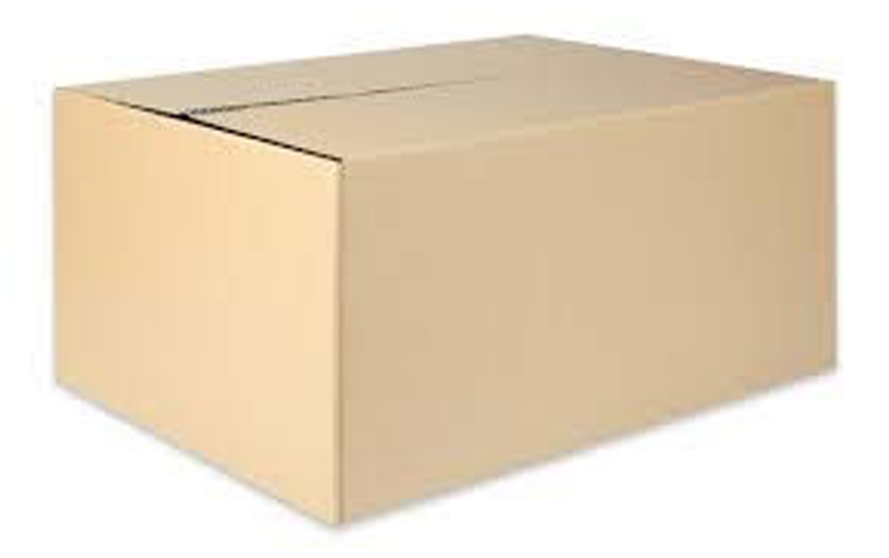

In [97]:
# show image using our helper function
imShow('predictions.jpg')

In [74]:
!cat custom.data

classes = 2
train = pose/custom.txt
names = pose/custom.names
backu = pose/backup

In [73]:
%ls

bad.list   chart_yolov4.png  darknet*  yolov4.cfg*      yolov4.weights*
chart.png  custom.data       pose/     yolov4.conv.137


## 파일 복사

In [30]:
files[0]

'/content/drive/MyDrive/T1_PJ/DATA/생활 폐기물 이미지/Training/페트_페트병_원본/23_X000_C025_1028/23_X000_C025_1028_0.jpg'

In [9]:
# readline_all.py
files = []
f = open("a.txt", 'r')

while True:
    line = f.readline()
    if not line: break
    files.append(line[:-1])
f.close()

In [11]:
import shutil
from tqdm import tqdm

name = 'pet'
count = 1
new_path = '/content/drive/MyDrive/img/'

for idx, file_path in tqdm(enumerate(files[:1093])):
  imageFilePath = file_path # '/content/drive/MyDrive/Project II/pet_data/' + 'train/' + file_path + '.jpg'
  new_name = name + str(count)
  shutil.copyfile(imageFilePath, new_path + new_name + '.jpg')
  count += 1

1039it [11:15,  1.54it/s]


In [165]:
f = open('a.txt', 'a')
for file in files[:1039]:
  f.write(file + '\n')
f.close()

In [166]:
f = open('b.txt', 'a')
for file in flist[:1039]:
  f.write(file + '\n')
f.close()

In [13]:
path = '/content/drive/MyDrive/T1_PJ/DATA/생활 폐기물 이미지/Training/'
image_path = path + '페트_페트병_원본/'
info_path = path + 'Training_라벨링데이터/페트_페트병/'

In [15]:
import glob

# 확장자
extension = "*.txt"

# 텍스트 파일이 저장될 경로
# save_at = '/content/drive/MyDrive/darknet/' + 'custom.txt'

# 대상 폴더에서 지정한 확장자를 가진 파일들의 경로를 리스트화
txt_list = sorted(glob.glob(image_path + '*/' + extension))
len(txt_list)

1039

In [16]:
name = 'pet'
count = 1
new_path = '/content/drive/MyDrive/img/'

for idx, file_path in tqdm(enumerate(txt_list[:1093])):
  imageFilePath = file_path # 
  new_name = name + str(count)
  shutil.copyfile(imageFilePath, new_path + new_name + '.txt')
  count += 1

1039it [12:13,  1.42it/s]
